# Lending Club Case Study
---

#### Problem Statement

A consumer finance company which specialises in lending various types of loans to urban customers needs to **identify key driving factors leading to the loans getting charged off**.

Based on these factors a decision has to be made about whether or not to approve the loan. There are 2 types of risks associated with bank's decision.

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### Data Set Given

Data about previous loan applicants have been given (including whether they defaulted or not) in a csv format along with data dictionary describing the columns.

The data set also contains information about whether these applications defaulted or not.

---

#### Loading and Understanding Data

In [7]:
# Importing numpy and pandas libraries

import numpy as np
import pandas as pd

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Loading data and checking shape
loan_df = pd.read_csv("loan.csv");
loan_df.shape

(39717, 111)

In [12]:
# checking a few records from the data set
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


---

#### Data Analysis

##### loan_status - _categorial variable_

In [14]:
# Univariate Analysis - checking possible values of loan_status
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

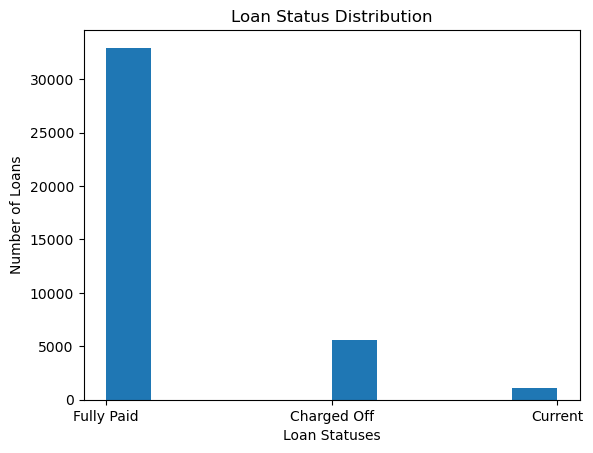

In [247]:
# checking the histogram to see possible values and corresponding counts
plt.hist(loan_df['loan_status'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Statuses')
plt.ylabel('Number of Loans')
plt.show()

In [18]:
# checking loan_status data type
loan_df['loan_status'].dtype

dtype('O')

In [24]:
# checking if there are any null values in loan_status column
loan_df['loan_status'].isnull().sum()

0

---

##### issue_d - _categorial varaiable_

In [26]:
# checking the missing values, data type and value counts
loan_df.issue_d.isnull().sum()

0

In [28]:
loan_df.issue_d.dtype

dtype('O')

In [115]:
loan_df.issue_d.head(5) # checking sample data to see the date format

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [113]:
# formatting issue_d column values to convert them into datetime
loan_df['issue_d_formatted'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# checking min and max values
loan_df['issue_d_formatted'].min()

Timestamp('2007-06-01 00:00:00')

In [49]:
loan_df['issue_d_formatted'].max()

Timestamp('2011-12-01 00:00:00')

In [111]:
# extracing month from issue_d column
loan_df['issue_year'] = loan_df['issue_d_formatted'].dt.year
loan_df['issue_year'].value_counts()

issue_year
2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

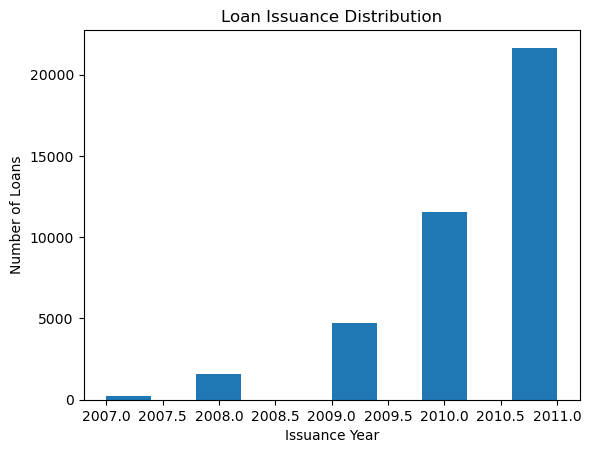

In [109]:
plt.hist(loan_df['issue_year'])
plt.title('Loan Issuance Distribution')
plt.xlabel('Issuance Year')
plt.ylabel('Number of Loans')
plt.show()

---

##### dti - debt to income ration - _quantitaive variable_

In [117]:
# Checking if dti (debt to income) column has any null values
loan_df['dti'].isnull().sum()

0

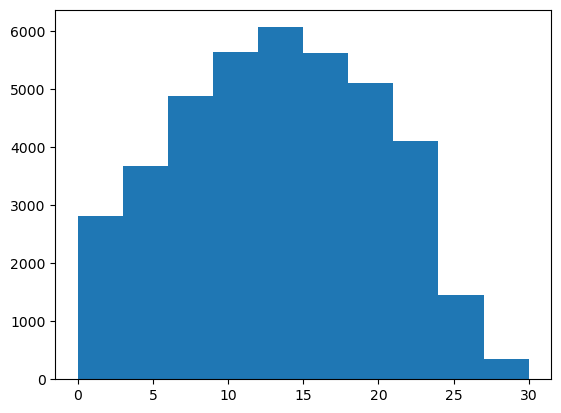

In [119]:
# checking histogram for dti variable
plt.hist(loan_df['dti'])
plt.show()

In [121]:
# Checking dti datatype
loan_df['dti'].dtype

dtype('float64')

In [123]:
# Checking dti column values
loan_df['dti'].value_counts()

dti
0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

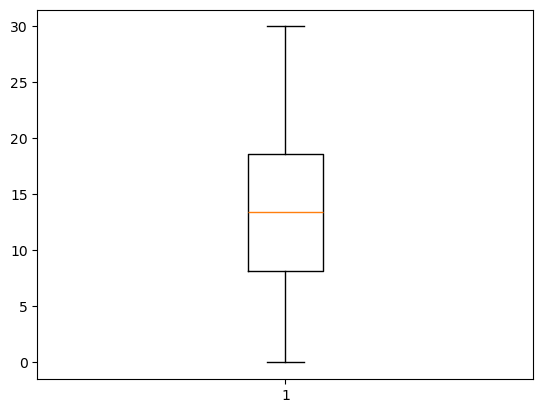

In [125]:
# checking dti values to see if there are any outliers
plt.boxplot(loan_df['dti'])
plt.show()

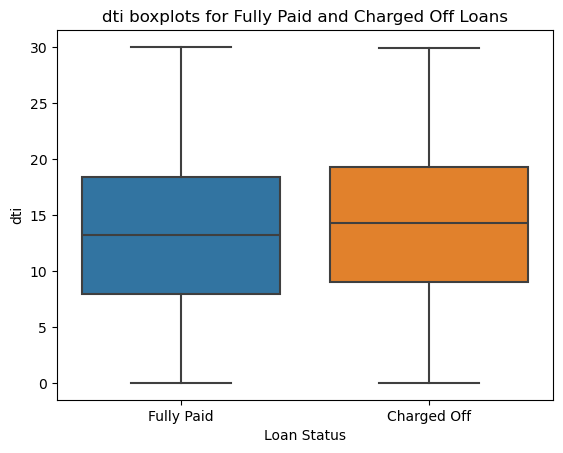

In [138]:
# creating a new data frame for fully paid and charged off loans
loan_fp_choff_df = loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])]

# checking the correlation between loan_status and dti column by drawing a box plot
sns.boxplot(x=loan_fp_choff_df['loan_status'],y=loan_fp_choff_df['dti'])
plt.title('dti boxplots for Fully Paid and Charged Off Loans')
plt.xlabel('Loan Status')
plt.ylabel('dti')
plt.show()

In [140]:
# checking the aggregagte values of dti for different loan_statuses
loan_df.groupby(by=loan_fp_choff_df.loan_status).dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85
Fully Paid,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99


---

##### int_rate (interest rate) - _quantitative variable_

In [142]:
# checking and cleaning int_rate values
loan_fp_choff_df['int_rate'].isnull().sum()

0

In [144]:
# checking data type
loan_fp_choff_df['int_rate'].dtype

dtype('O')

In [146]:
# checking possible values
loan_fp_choff_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [148]:
# Formatting column values and changing data type
loan_fp_choff_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.replace('%',''))

In [150]:
loan_fp_choff_df['int_rate'] = loan_fp_choff_df['int_rate'].astype('float64')
loan_fp_choff_df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

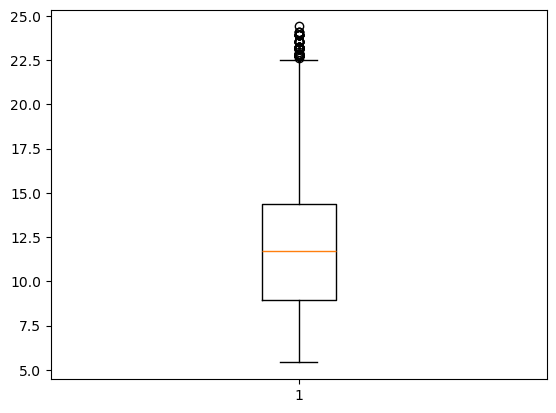

In [152]:
# checking the boxplot to see if there are any outliers
plt.boxplot(loan_fp_choff_df['int_rate'])
plt.show()

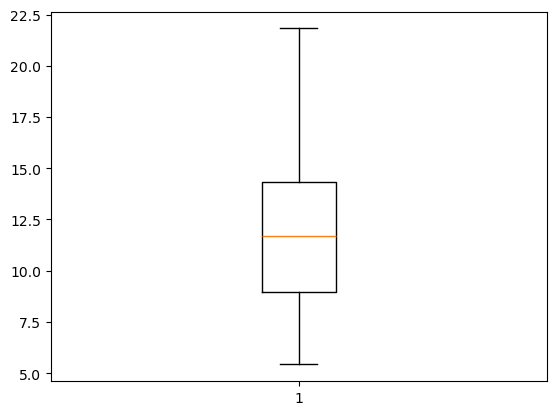

In [156]:
# removing outliers for interest rate column
loan_fp_choff_df = loan_fp_choff_df[loan_fp_choff_df['int_rate'] <= 22]
plt.boxplot(loan_fp_choff_df['int_rate'])
plt.show()

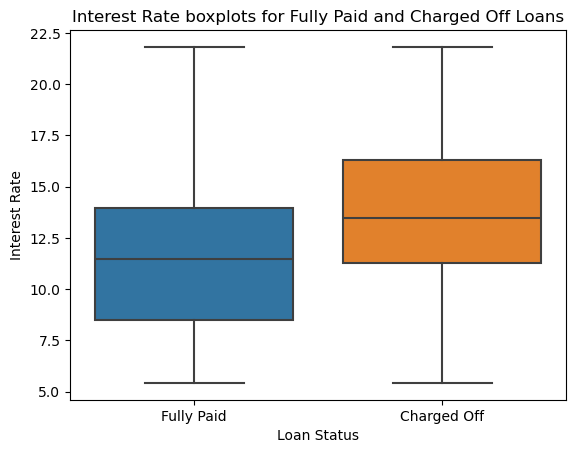

In [162]:
# checking correlation between int_rate and loan_statuses by drawing a boxplots for different values of loan statuses
sns.boxplot(x=loan_fp_choff_df['loan_status'],y=loan_fp_choff_df['int_rate'])
plt.title('Interest Rate boxplots for Fully Paid and Charged Off Loans')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

In [160]:
# checking the aggregagte values of int_rate for different loan_statuses
loan_fp_choff_df.groupby(by=loan_fp_choff_df.loan_status).int_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5556.0,13.708015,3.538309,5.42,11.26,13.49,16.32,21.82
Fully Paid,32864.0,11.580829,3.559760,5.42,8.49,11.49,13.98,21.82


---

##### term - _categorical variable_

In [164]:
# checking missing values and possible values of term
loan_fp_choff_df['term'].isnull().sum()

0

In [166]:
loan_fp_choff_df['term'].value_counts()

term
 36 months    29089
 60 months     9331
Name: count, dtype: int64

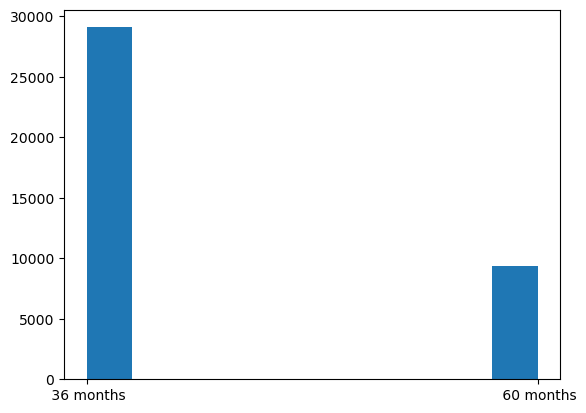

In [170]:
# checking histogram for term variable
plt.hist(loan_fp_choff_df['term'])
plt.show()

In [200]:
# checking correlation between loan term and loan getting charged-off
loan_fp_choff_df.groupby(by='loan_status').term.value_counts()

loan_status  term      
Charged Off   36 months     3225
              60 months     2331
Fully Paid    36 months    25864
              60 months     7000
Name: count, dtype: int64

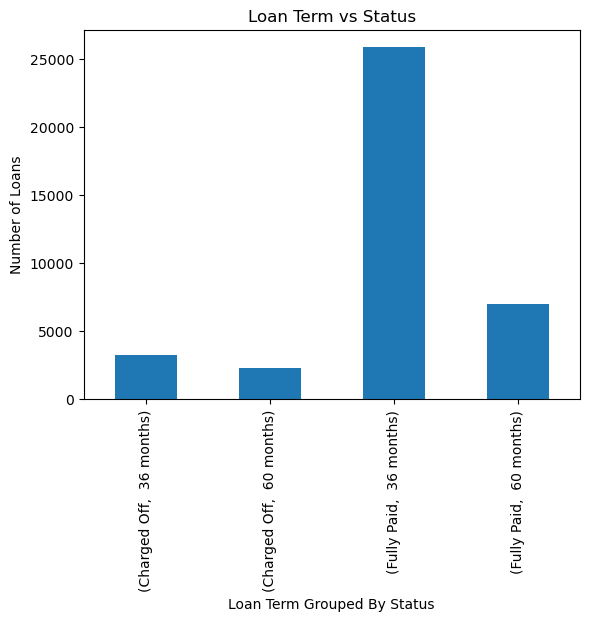

In [202]:
loan_fp_choff_df.groupby(by='loan_status').term.value_counts().plot.bar()
plt.title('Loan Term vs Status')
plt.xlabel('Loan Term Grouped By Status')
plt.ylabel('Number of Loans')
plt.show()

---

##### delinq_2yrs - _quantitative variable_

In [208]:
# checking missing values, data type and possible values
loan_fp_choff_df['delinq_2yrs'].isnull().sum()

0

In [210]:
loan_fp_choff_df['delinq_2yrs'].dtype

dtype('int64')

In [212]:
loan_fp_choff_df['delinq_2yrs'].value_counts()

delinq_2yrs
0     34267
1      3185
2       663
3       208
4        58
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

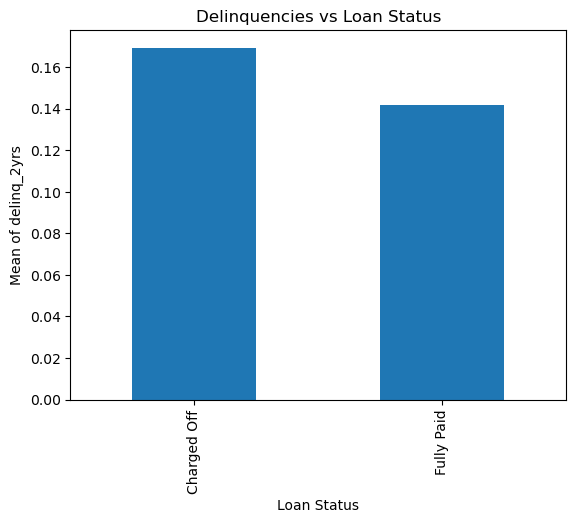

In [250]:
# chekcing correlation between delinq_2yrs and loan getting charged off
loan_fp_choff_df.groupby(by='loan_status').delinq_2yrs.mean().plot.bar()
plt.title('Delinquencies vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean of delinq_2yrs')
plt.show()

In [216]:
loan_fp_choff_df.groupby(by='loan_status').delinq_2yrs.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5556.0,0.169366,0.532918,0.0,0.0,0.0,0.0,8.0
Fully Paid,32864.0,0.141644,0.482529,0.0,0.0,0.0,0.0,11.0


---

##### revol_util - _quantitative variable_

In [229]:
# Checking possible values for revol_util variable
loan_fp_choff_df['revol_util'].value_counts()

revol_util
0%        953
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [239]:
# Formatting revol_util values for analysing aggregate values groping them based on loan statues
loan_fp_choff_df['revol_util'] = loan_fp_choff_df['revol_util'].astype(str)
loan_fp_choff_df['revol_util'] = loan_fp_choff_df['revol_util'].apply(lambda x: x.replace('%',''))
loan_fp_choff_df['revol_util'] = loan_fp_choff_df['revol_util'].astype('float64')
loan_fp_choff_df['revol_util'].describe()

count    38371.000000
mean        48.590758
std         28.327062
min          0.000000
25%         25.100000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

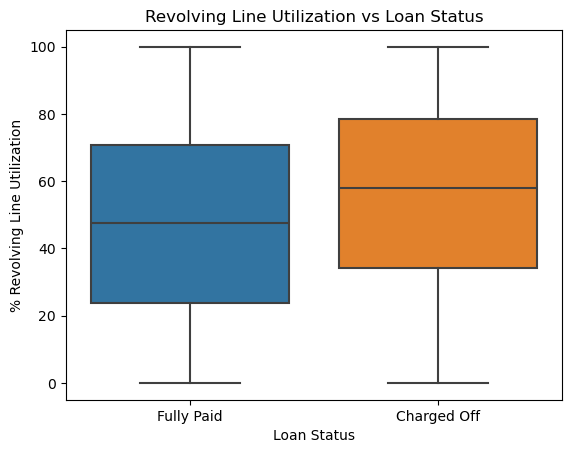

In [252]:
# Plotting revol_util for Fully Paid and Charged Off Loans
sns.boxplot(x=loan_fp_choff_df['loan_status'],y=loan_fp_choff_df['revol_util'])
plt.title('Revolving Line Utilization vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('% Revolving Line Utilization')
plt.show()

In [245]:
# Checking aggregate values for different loan statues
loan_fp_choff_df.groupby(by='loan_status').revol_util.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5541.0,55.314349,27.863705,0.0,34.3,58.1,78.6,99.9
Fully Paid,32830.0,47.455960,28.247525,0.0,23.8,47.5,70.7,99.9
